<a href="https://colab.research.google.com/github/gbangout-apziva/MonReader/blob/main/monreader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hardware and vision

We want to predict if an image is flip or not.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
from PIL import Image,ImageOps

## Data Preparation
* Data Exploration
* Splitting data into train and test
* Data preprocessing

In [ ]:
src="/content/drive/MyDrive/colabnotes/monreader/images/training/flip/"
file="0001_000000010.jpg"
im=Image.open(src+file)
width, height = im.size
print(width), print(height)
len(im.fp.read())
#display(im)

In [ ]:
(left, upper, right, lower) = (0, 250, 1050, 1200)
im_crop = im.crop((left, upper, right, lower))
display(im_crop)
width, height = im_crop.size
width, height
im_crop.save("/content/drive/MyDrive/colabnotes/monreader/images/training/cropped_image.jpg")



In [ ]:
#im_crop.save("/content/drive/MyDrive/colabnotes/monreader/images/training/cropped_image_lowq.jpg",quality=20,optimize=True)

In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/training/flip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/training/flip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)


In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/training/notflip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/training/notflip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)

In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/testing/flip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/testing/flip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)

In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/testing/notflip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/testing/notflip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)

In [ ]:
#Build Training data
X_train=[]
y_train=[]
#Load arrays for each of the positive classes in training data and add a label of 1
src="/content/drive/MyDrive/colabnotes/monreader/images/training/flip_treated/"
files=os.listdir(src)
for file in files:
    X_train.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_train.append(1)

In [ ]:
#load arrays for each of the negative classes in training data and add a label of 0
src="/content/drive/MyDrive/colabnotes/monreader/images/training/notflip_treated/"
files=os.listdir(src)
for file in files:
    X_train.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_train.append(0)

In [ ]:
#Build test data
#X_test=[]
#y_test=[]
#load arrays for each of the positive classes in test data and add a label of 1
#src="/content/drive/MyDrive/colabnotes/monreader/images/testing/flip/"
#files=os.listdir(src)
#for file in files:
#    X_test.append(np.array(ImageOps.grayscale(Image.open(src+file))))
#    y_test.append(1)

In [ ]:
#load arrays for each of the negative classes in test data and add a label of 0
#src="/content/drive/MyDrive/colabnotes/monreader/images/testing/notflip/"
#files=os.listdir(src)
#for file in files:
#    X_test.append(np.array(ImageOps.grayscale(Image.open(src+file))))
#    y_test.append(0)

In [ ]:
X_train=np.array(X_train)
#X_test=np.array(X_test)

In [ ]:
y_train=np.array(y_train)
#y_test=np.array(y_test)

In [ ]:
#X=X_train.copy()
#y=y_train.copy()

In [ ]:
#X_train_reshaped=X_train.reshape(X_train.shape[0], -1)
#y_train_reshaped=y_train.reshape(y_train.shape[0], -1)

In [ ]:
#np.savetxt("/content/drive/MyDrive/colabnotes/monreader/X.txt",X_train_reshaped)
#np.savetxt("/content/drive/MyDrive/colabnotes/monreader/y.txt",y_train_reshaped)

In [ ]:
#loaded_X = np.loadtxt("X.txt")
#loaded_y = np.loadtxt("y.txt")

In [ ]:
#load_original_X = loaded_X.reshape(loaded_X.shape[0], loaded_X.shape[1] // X_train.shape[2], X_train.shape[2])
#load_original_y = loaded_y.reshape(loaded_y.shape[0], loaded_y.shape[1] // y_train.shape[2], y_train.shape[2])

In [ ]:
X_train.shape

In [ ]:
#X_test.shape

In [5]:
from sklearn.model_selection import train_test_split

In [4]:
import pickle

In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train , test_size = 0.1, random_state = 100)
X_train1.shape, X_val.shape, y_train1.shape, y_val.shape

In [ ]:
# Saving the objects:
#with open('/content/drive/MyDrive/colabnotes/monreader/objs.pkl', 'wb') as f:
#    pickle.dump([X_train1, X_val, y_train1, y_val], f)

In [6]:
# Getting back the objects:
with open('/content/drive/MyDrive/colabnotes/monreader/objs.pkl','rb') as f:  # Python 3: open(..., 'rb')
    X_train1, X_val, y_train1, y_val = pickle.load(f)

In [7]:
X_train1.shape, X_val.shape, y_train1.shape, y_val.shape

((2152, 950, 1050, 1), (240, 950, 1050, 1), (2152,), (240,))

In [8]:
#Reshape to make these work for keras neural network
X_train1=X_train1.reshape(2152,950,1050,1)
X_val=X_val.reshape(240,950,1050,1)

## Modelling

In [9]:
#Import packages to build neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [19]:
#Create the model
cnn=Sequential()
#initially 16 convolution nodes
cnn.add(Conv2D(16,(3,3),padding="same",activation='relu',input_shape=X_train1.shape[1:]))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 16 convolution nodes
cnn.add(Conv2D(16,(3,3),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 8 convolutions
cnn.add(Conv2D(8,(2,2),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 50 nodes
cnn.add(Dense(50,activation='relu'))
#Add another hidden layer with 25 nodes
cnn.add(Dense(25,activation='relu'))
#Add final output layer with 1 output nodes using sigmoid
cnn.add(Dense(1,activation='sigmoid'))

In [20]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 950, 1050, 16)     160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 475, 525, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 475, 525, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 237, 262, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 237, 262, 8)       520       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 118, 131, 8)     

In [21]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [22]:
#train the network
history=cnn.fit(X_train1,y_train1,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
68/68 [==============================] - 54s 718ms/step - loss: 6.6438 - accuracy: 0.6761 - val_loss: 0.3381 - val_accuracy: 0.8250
Epoch 2/10
68/68 [==============================] - 47s 690ms/step - loss: 0.1850 - accuracy: 0.9387 - val_loss: 0.1485 - val_accuracy: 0.9542
Epoch 3/10
68/68 [==============================] - 47s 691ms/step - loss: 0.0902 - accuracy: 0.9703 - val_loss: 0.0991 - val_accuracy: 0.9625
Epoch 4/10
68/68 [==============================] - 47s 690ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.1426 - val_accuracy: 0.9500
Epoch 5/10
68/68 [==============================] - 47s 692ms/step - loss: 0.0259 - accuracy: 0.9963 - val_loss: 0.0781 - val_accuracy: 0.9833
Epoch 6/10
68/68 [==============================] - 47s 690ms/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 0.1905 - val_accuracy: 0.9458
Epoch 7/10
68/68 [==============================] - 47s 690ms/step - loss: 0.0174 - accuracy: 0.9930 - val_loss: 0.1477 - val_accuracy: 0.9417

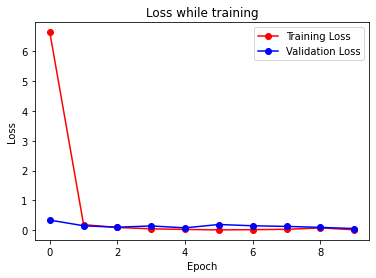

In [23]:
plt.plot(history.history["loss"],color="r",marker="o")
plt.plot(history.history["val_loss"],color="b",marker="o")
plt.title("Loss while training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

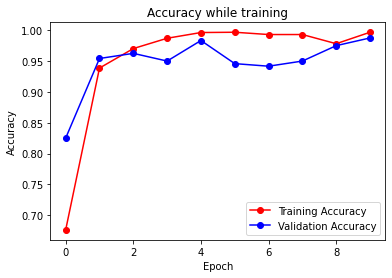

In [24]:
plt.plot(history.history["accuracy"],color="r",marker="o")
plt.plot(history.history["val_accuracy"],color="b",marker="o")
plt.title("Accuracy while training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [25]:
y_pred=cnn.predict(X_val)>=0.5

8/8 [==============================] - 1s 140ms/step


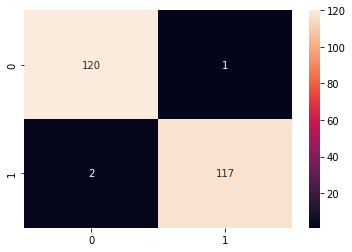

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='g')
plt.show()

In [27]:
print(f1_score(y_val,y_pred))

0.9873417721518987


In [28]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       121
           1       0.99      0.98      0.99       119

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



In [29]:
print(accuracy_score(y_val,y_pred))

0.9875
